## Python 포토폴리오
### 주제: 저출산 문제로 초등학교 학생 수 감소와 사교육비의 상관관계

* 수행 인원 1명
* 수행 기간 : 2023.04.17 ~2023.04.21

### 시각화 전략
 - 시각화 목표 1: 초등학교 학생의 1인당 교육비
 - 시각화 목표 2: 특성별 초등학생 사교육비 사용처
 - 시각화의 범위 : 초등학생 학생의 현황, 2012-2022년까지, 학교급별 사교육비 총액 2012-2022
 - 시각화의 개발절차 : kosis.kr 에서 데이터 확보, 분석 후 시각화, 결측치, 오류치 정제 작업, 중복된 값을 제거

### 시각화 요구사항
- 사용자 수준/ 취향/ 목적 : 곧 초등학교 진학을 앞둔 부부. 앞으로 지출될 사교육비가 걱정된다.
- 시나리오 / 스토리보드 개발 : 평균적으로 초등학생은 얼마의 사교육비를 지출하는지 알고싶다.

### 데이터 시각화 명세서
- 시각화 표현의 형태, 규칙, 패턴, 상호작용 : lineplot,histplot을 사용하여 lineplot에는 년도별 1인당 초등학생당 사교육비의 증감그래프를 시각화하고, histplot에는 특성별로 초등학생은 어느 과목에 사교육비가 사용되었는지 시각화한다.

### 시각화 명세서 기반 설계
- 시각화 UI 설계: 년도별 lineplot을 seaborn으로 1인당_년_사교육비 시각화를 하고, histplot으로 초등학생 사교육비를 특성별로 시각화 하였다.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:\Windows\Fonts\HMKMRHD.TTF"
kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont]+current_font_list

### 초등학생의 수를 정제
- '-' --> 오류치 '0'

In [8]:
element_school_students = pd.read_csv('초등학교_개황_2012-2022.csv',encoding='cp949', header=0)
middle_school_student = pd.read_csv('중학교_개황_2012-2022.csv',encoding='cp949', header=0)
high_school_student = pd.read_csv('고등학교_개황_2012-2022.csv',encoding='cp949', header=1)

element_school_students['학생수 (명)'] = element_school_students['학생수 (명)'].replace('-','0').astype(np.int64)
middle_school_student['학생수 (명)'] = middle_school_student['학생수 (명)'].replace('-','0').astype(np.int64)
high_school_student['1학년'] = high_school_student['1학년'].replace('-','0').astype(np.int64)
high_school_student['2학년'] = high_school_student['2학년'].replace('-','0').astype(np.int64)
high_school_student['3학년'] = high_school_student['3학년'].replace('-','0').astype(np.int64)

high_school_student['학생수 (명)'] = high_school_student['1학년']+high_school_student['2학년']+high_school_student['3학년']
high_school_student = high_school_student.drop(columns=['1학년','2학년','3학년'])

### 학교급별 사교육비 총액 데이터
- 고등학교(억원)에 일반고(억원)의 비용이 포함되어 있는 비용이므로 제거

In [9]:
private_education_data = pd.read_csv('학교급별_사교육비_총액_2012-2022_서울_광역시별.csv',encoding='cp949')
# private_education_data.dtypes
private_education_data = private_education_data.drop(columns=['일반고 (억원)'], axis=1)
# private_education_data

### 시각화 목표 1: 초등학교 학생의 1인당 교육비
### 시각화 목표 2: 특성별 초등학생 사교육비 사용처

In [10]:
# 전국의 초등학생의 수
filter1 = element_school_students['설립주체별(1)'] == '계'
filter2 = element_school_students['시도별(1)'] == '총계'
element_school_students_f = element_school_students[filter1]
element_school_students_f2 = element_school_students_f[filter2]
# element_students_data_f2

C:\Users\dlgus\AppData\Local\Temp\ipykernel_19944\1018967976.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  element_school_students_f2 = element_school_students_f[filter2]


### 초등학생의 사교육비만을 보고 싶어서 나머지 데이터 제거

In [11]:
filter1 = private_education_data['특성별'] == '전체'
private_education_data_element = private_education_data[filter1]
private_education_data_element = private_education_data_element.drop(columns=['전체 (억원)','중학교 (억원)','고등학교 (억원)'])
# private_education_data_element

In [12]:
frames1 = [element_school_students_f2.set_index(['시점']),private_education_data_element.set_index(['시점'])]

a = pd.concat(frames1, axis=1)
df1 = a.reset_index()
df1['1인당_년_초등교육비(천원)'] = ((df1['초등학교 (억원)'] * 100000) / df1['학생수 (명)'])
# df1

### 년도별 1인당 초등학생의 교육비 증감

### 사용되는 사교육비의 분야는 어딘가?

<Axes: xlabel='시점', ylabel='초등학교 (억원)'>

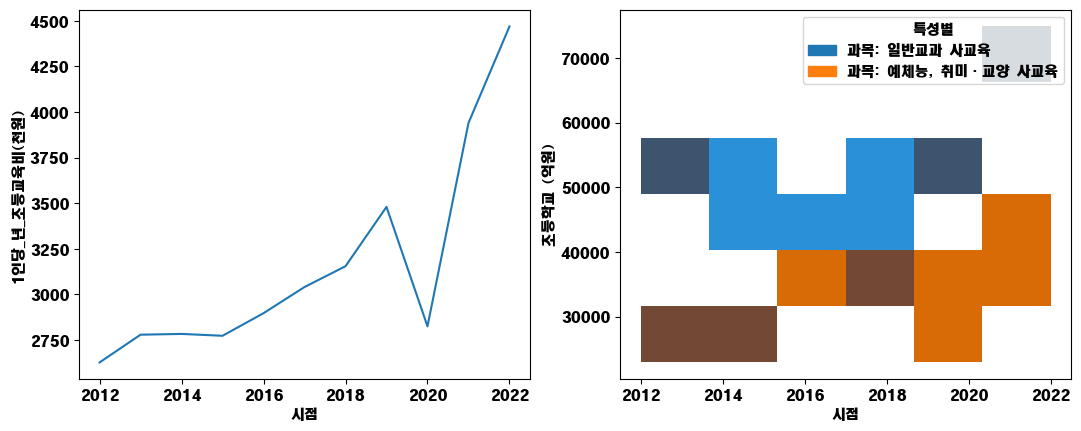

In [14]:
fig = plt.figure(figsize=(6.4*2,4.8*1))
x1 = fig.add_subplot(1,2,1)
x2 = fig.add_subplot(1,2,2)
sns.lineplot(data=df1,x='시점',y='1인당_년_초등교육비(천원)', ax=x1)
sns.histplot(data=test1, x='시점', y = '초등학교 (억원)', hue='특성별', ax=x2)

In [13]:
filter1 = private_education_data['특성별'] != '전체'
private_education_data_element = private_education_data[filter1]
private_education_data_element = private_education_data_element.drop(columns=['전체 (억원)','중학교 (억원)','고등학교 (억원)'])
private_education_data_element

filter2 = []
for e in private_education_data['특성별']:
    if '과목' in e:
        filter2.append(True)
    else:
        filter2.append(False)

# print(filter2)
test1= private_education_data[filter2]
# test1

### 시각화 전략
 - 시각화 목표: 초등학교. 중학교,고등학교 사교육비 규모 추이
 - 시각화의 범위 : 학교급별 사교육비 총액 2012-2022
 - 시각화의 개발절차 : kosis.kr 에서 데이터 확보, 분석 후 시각화, 결측치, 오류치 정제 작업, 중복된 값을 제거

### 시각화 요구사항
- 사용자 수준/ 취향/ 목적 : 곧 초등학교 진학을 앞둔 부부. 앞으로 지출될 사교육비가 걱정된다. 미래에 초,중,고등학교 교육비로 얼마나 지출이 될지 예상하여 본다.
- 시나리오 / 스토리보드 개발 : 앞으로 교육비는 얼마나 지출하게 될지 알고싶다.

### 데이터 시각화 명세서
- 시각화 표현의 형태, 규칙, 패턴, 상호작용 : lineplot,histplot을 사용하여 lineplot에는 년도별 초등학교, 중학교, 고등학교에 들어가게 될 사교육비의 규모를 시각화한다.

### 시각화 명세서 기반 설계
- 시각화 UI 설계: 년도별 lineplot으로 1번째는 초등학교 사교육비의 그림이고, 두번째는 중학교 사교육비의 그림, 세번째는 고등학교 사교육비를 시각화 한다.

### 초 중 고등학생별 사교육비의 증감

<Axes: title={'center': '고등학교 사교육비'}, xlabel='시점', ylabel='고등학교 (억원)'>

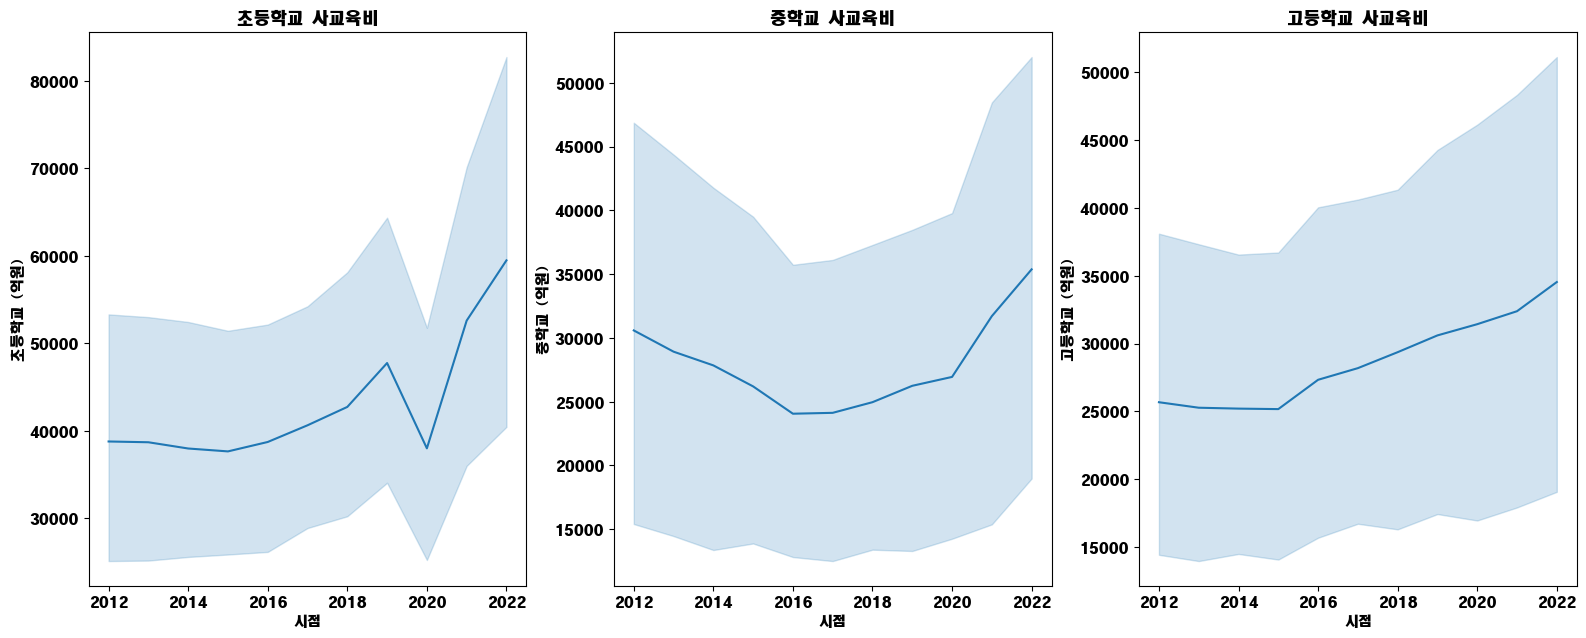

In [15]:
fig = plt.figure(figsize=(6.4*3,4.8*1.5))
x1 = fig.add_subplot(1,3,1)
x2 = fig.add_subplot(1,3,2)
x3 = fig.add_subplot(1,3,3)

x1.set_title('초등학교 사교육비')
x2.set_title('중학교 사교육비')
x3.set_title('고등학교 사교육비')

sns.lineplot(data=private_education_data,x='시점',y='초등학교 (억원)', ax=x1)
sns.lineplot(data=private_education_data,x='시점',y='중학교 (억원)', ax=x2)
sns.lineplot(data=private_education_data,x='시점',y='고등학교 (억원)', ax=x3)

초중고 중 어느때에 1인당 비용이 많이 들어갈지?

### 시각화 전략
 - 시각화 목표: 년도별, 사립,공립,국립 학생수가 많은 시도 Top5
 - 시각화의 범위 : 고등학생 학생의 현환 2012-2022
 - 시각화의 개발절차 : kosis.kr 에서 데이터 확보, 분석 후 시각화, 결측치, 오류치 정제 작업, 중복된 값을 제거

### 시각화 요구사항
- 사용자 수준/ 취향/ 목적 : 교육부에서 각 시도별로 어느 설립주체가 어느곳에 많은 학생들이 진학을 하고 있는지 알고 싶은 공무원 A씨.
- 시나리오 / 스토리보드 개발 : 각 시도별 교육청마다 교육정책 방향을 결정하는데 참조할 수 있다.

### 데이터 시각화 명세서
- 시각화 표현의 형태, 규칙, 패턴, 상호작용 : pie 그래프를 이용하여 각 년도별, 시도별로 국립,사립,공립학교에 다니는 학생의 수를 pie 그래프로 시각화해본다. 학생의 수가 많은 시도 Top5를 뽑는다.

### 시각화 명세서 기반 설계
- 시각화 UI 설계: 년도별로 나누고, 설립주체별로 사립, 공립, 국립을 나눈다. 설립주체별로 사립학교 중에서 학생수가 많은 시도 Top5을 뽑고, 공립학교 중에 학생수가 많은 시도를 Top5을 뽑고, 국립학교 중에서 학생수가 많은 시도 Top5를 뽑는다.

In [16]:
filter1 = high_school_student['설립주체별(1)'] != '계'
high_school_student_f = high_school_student[filter1]
filter2 = high_school_student_f['시도별(1)'] != '총계'
high_school_student_f2 = high_school_student_f[filter2]
# high_school_student_f2

In [17]:
def myfn1(df):
    private_sh = []
    for i in df['설립주체별(1)']:
        if '사립' in i:
            private_sh.append(True)
        else:
            private_sh.append(False)
    return private_sh
def myfn2(df):
    public_sh = []
    for i in df['설립주체별(1)']:
        if '공립' in i:
            public_sh.append(True)
        else:
            public_sh.append(False)
    return public_sh
def myfn3(df):
    national_sh =[]
    for i in df['설립주체별(1)']:
        if '국립' in i:
            national_sh.append(True)
        else:
            national_sh.append(False)
    return national_sh

df1 = high_school_student_f2.loc[myfn1(high_school_student_f2)]
df2 = high_school_student_f2[myfn2(high_school_student_f2)]
df3 = high_school_student_f2[myfn3(high_school_student_f2)]

### 사립학교의 분포

서울 경기 부산 대구 경북 순으로 분포하고 있다.

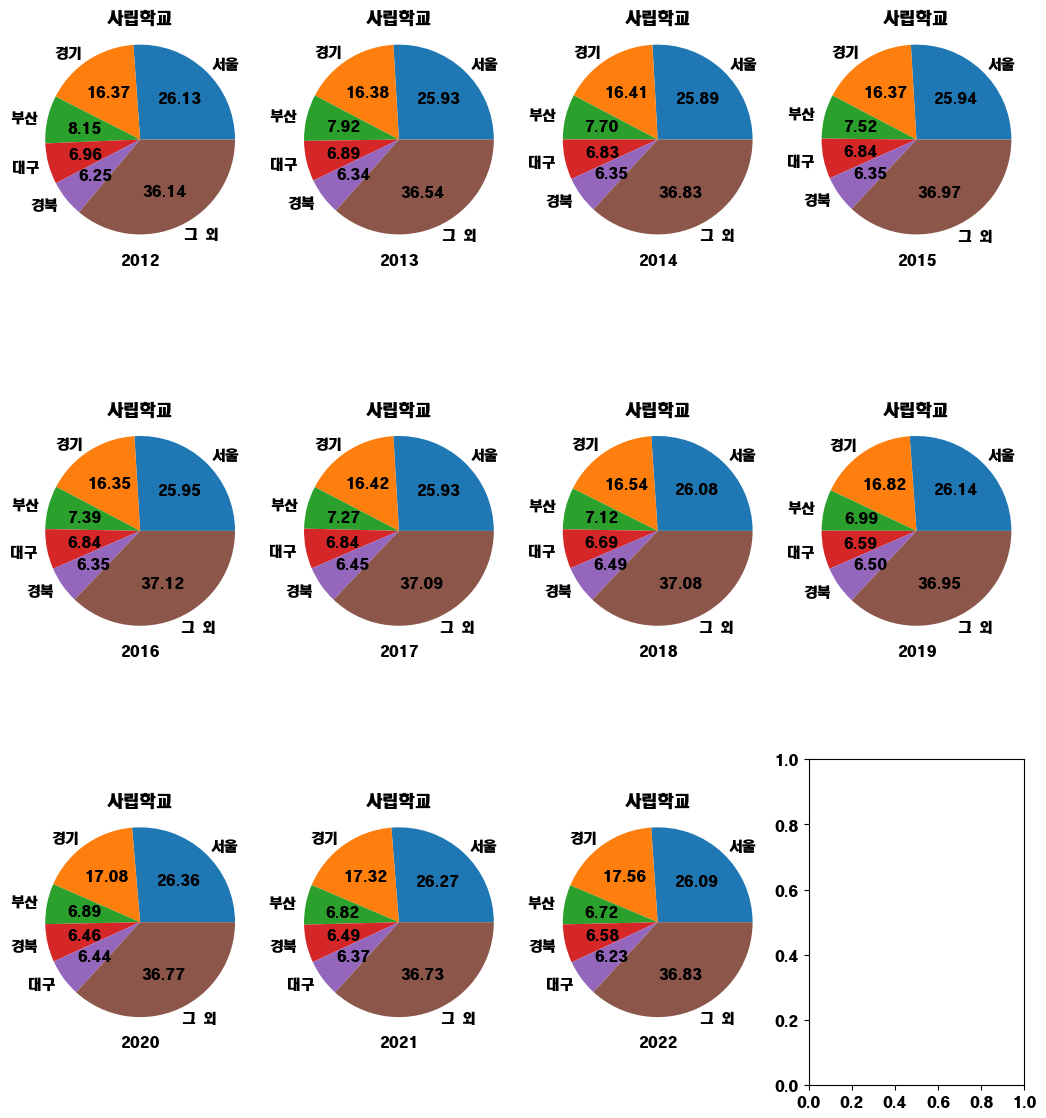

In [18]:
fig, axes = plt.subplots(3,4,figsize=(6.4*2, 4.8*3))
col_name = df1.columns

for i,e in enumerate(df1['시점'].unique()):
    filter1 = df1['시점'] == e
    ax = axes[i//4,i%4]
    xs = df1.loc[filter1,'시도별(1)']
    ys = df1.loc[filter1,col_name].sort_values('학생수 (명)', ascending=False)
    top5 = ys.iloc[:5,-1].to_list()
    others = ys.iloc[5:,-1].sum()
    top5.append(others)
    top5_l = ys.iloc[:5,0].to_list()
    top5_l = top5_l + ['그 외']
#     print(ys)
#     print(top5_l)
#     print(others)
    
    ax.set_title('사립학교')
    ax.set_xlabel(e)
    ax.pie(top5, labels=top5_l, radius=1.1, autopct='%.2f')

### 공립학교의 분포
경기 서울 경남 인천 부산 순으로 나타나다가 2015 경기 서울 경남 인천 충남 순으로 부산의 순위가 내려감을 확인 할 수 있다.

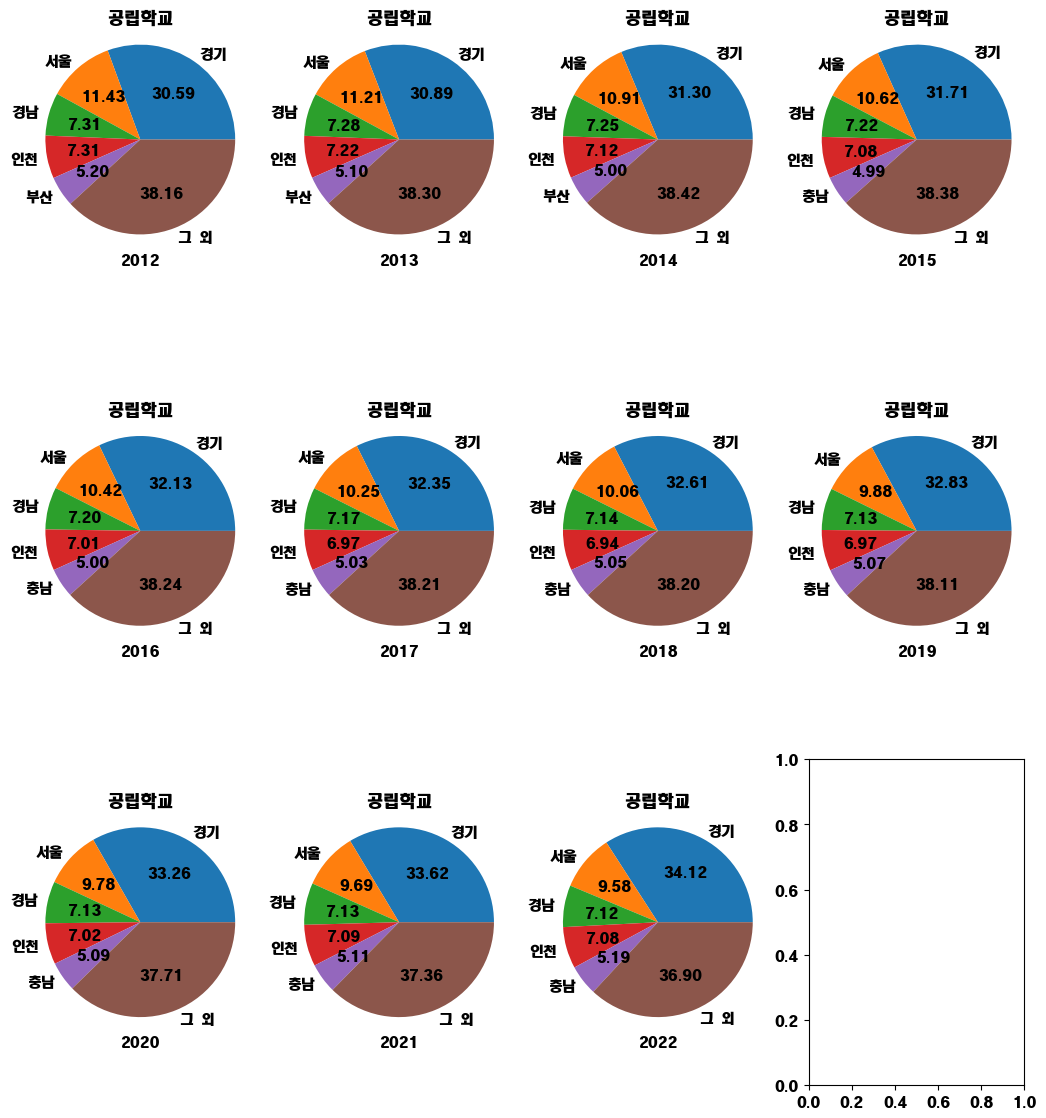

In [19]:
fig, axes = plt.subplots(3,4,figsize=(6.4*2, 4.8*3))
col_name = df2.columns
# axes.set_title('공립')
for i,e in enumerate(df1['시점'].unique()):
    filter1 = df2['시점'] == e
    ax = axes[i//4,i%4]
    xs = df2.loc[filter1,'시도별(1)']
    ys = df2.loc[filter1,col_name].sort_values('학생수 (명)', ascending=False)
    top5 = ys.iloc[:5,-1].to_list()
    others = ys.iloc[5:,-1].sum()
    top5.append(others)
    top5_l = ys.iloc[:5,0].to_list()
    top5_l = top5_l + ['그 외']
#     print(ys)
#     print(top5_l)
#     print(others)
    ax.set_title('공립학교')
    ax.set_xlabel(e)
    ax.pie(top5, labels=top5_l, radius=1.1, autopct='%.2f')

### 국립학교의 분포
부산 서울 전북 충북 대구 순으로 나타나고 대구의 경우 점점 감소세를 보이고 2022년에 제주가 대구 보다 많은 분포를 가지기 시작하였다.

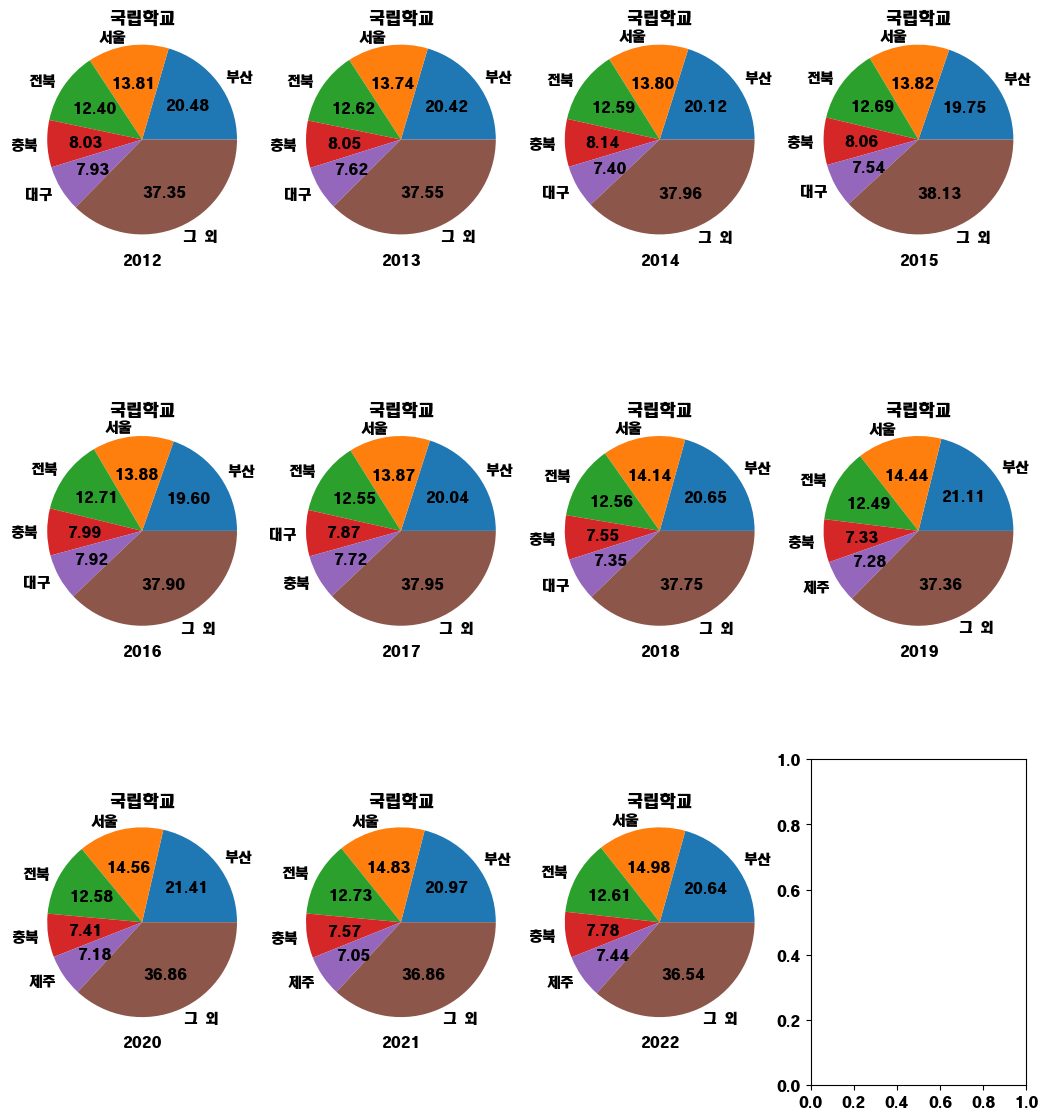

In [21]:
fig, axes = plt.subplots(3,4,figsize=(6.4*2, 4.8*3))
col_name = df3.columns

for i,e in enumerate(df1['시점'].unique()):
    filter1 = df3['시점'] == e
    ax = axes[i//4,i%4]
    xs = df3.loc[filter1,'시도별(1)']
    ys = df3.loc[filter1,col_name].sort_values('학생수 (명)', ascending=False)
    top5 = ys.iloc[:5,-1].to_list()
    others = ys.iloc[5:,-1].sum()
    top5.append(others)
    top5_l = ys.iloc[:5,0].to_list()
    top5_l = top5_l + ['그 외']
#     print(ys)
#     print(top5_l)
#     print(others)
    
    ax.set_title('국립학교')
    ax.set_xlabel(e)
    ax.pie(top5, labels=top5_l, radius=1.1, autopct='%.2f')

# 결론

* 코로나 19 시기에 사교육비의 일시적인 감소가 보이지만 전반적으로 점차 증가하고 있음을 확인 할 수 있었다.
* 시도별 사립,국립, 공립학교의 진학하는 비율로 보면 시도별로 진학하고자 하는 학교가 차이가 있음을 알 수 있었다.

## 추후 분석해 볼만 한 점

* 초등학교에 진학하는 인구는 감소를 하지만 사교육비에 대한 지출이 증가세를 확인 할 수 있다.
* 추가적인 자료로 사교육비와 사교육비 대비 학생의 학업성취도와 공교육만 하는 학생의 학업성취도, 학생의 행복도에 대한 상관관계를 알아 보면, 더 의미 있는 자료가 될 것 이다. 